# Simple Linear Regression with Numpy

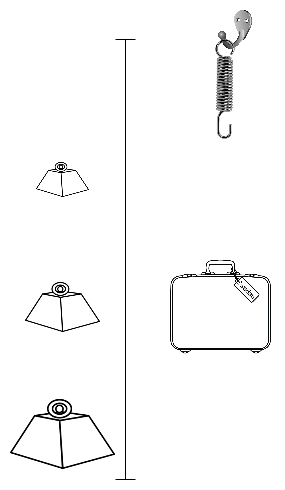

#### Scenario
Suppose you are trying to weigh your suitcase to avoid an airline's extra charges.
You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG.
You attach the spring to the wall hook, and mark where the bottom of it hangs.
You then hang the 7KG weight on the end and mark where the bottom of the spring is.
You repeat this with the 14KG weight and the 21KG weight.
Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark.
Is your case over the 10KG limit set by the airline?

#### Hypothesis
When you look at the marks on the wall, it seems that the 0KG, 7KG, 14KG and 21KG marks are evenly spaced.
You wonder if that means your case weighs 10.5KG.
That is, you wonder if there is a *linear* relationship between the distance the spring's hook is from its resting position, and the mass on the end of it.

#### Experiment
You decide to experiment.
You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG.
You place them each in turn on the spring and measure the distance the spring moves from the resting position.
You tabulate the data and plot them.

#### Analysis
Here we'll import hte Python libraries we need for or investigations below.

In [1]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as pl

Ignore the next couple of lines where I fake up some data!

In [21]:
x = np.arange(1.0, 16.0, 1.0)
y = 5.0 * x + 10.0 + np.random.normal(0.0, 5.0, x.size)

Let's have a look at the data from our experiment.

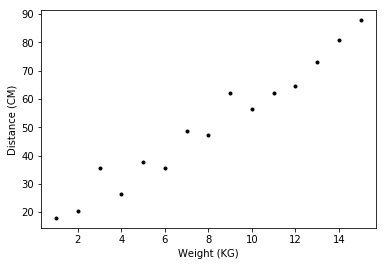

In [22]:
# Create the plot.
pl.plot(x, y, 'k.')

# Set some properties for the plot.
pl.xlabel('Weight (KG)')
pl.ylabel('Distance (CM)')

# Show the plot.
pl.show()

Let's simulate having lots of standard weights to investigate our spring with.
We'll use weights of all masses from 0KG to 14.9KG in 0.1KG increments. 0KG represents no weight.

In [2]:
x = np.arange(0.0, 15.0, 0.1)
x

array([  0. ,   0.1,   0.2,   0.3,   0.4,   0.5,   0.6,   0.7,   0.8,
         0.9,   1. ,   1.1,   1.2,   1.3,   1.4,   1.5,   1.6,   1.7,
         1.8,   1.9,   2. ,   2.1,   2.2,   2.3,   2.4,   2.5,   2.6,
         2.7,   2.8,   2.9,   3. ,   3.1,   3.2,   3.3,   3.4,   3.5,
         3.6,   3.7,   3.8,   3.9,   4. ,   4.1,   4.2,   4.3,   4.4,
         4.5,   4.6,   4.7,   4.8,   4.9,   5. ,   5.1,   5.2,   5.3,
         5.4,   5.5,   5.6,   5.7,   5.8,   5.9,   6. ,   6.1,   6.2,
         6.3,   6.4,   6.5,   6.6,   6.7,   6.8,   6.9,   7. ,   7.1,
         7.2,   7.3,   7.4,   7.5,   7.6,   7.7,   7.8,   7.9,   8. ,
         8.1,   8.2,   8.3,   8.4,   8.5,   8.6,   8.7,   8.8,   8.9,
         9. ,   9.1,   9.2,   9.3,   9.4,   9.5,   9.6,   9.7,   9.8,
         9.9,  10. ,  10.1,  10.2,  10.3,  10.4,  10.5,  10.6,  10.7,
        10.8,  10.9,  11. ,  11.1,  11.2,  11.3,  11.4,  11.5,  11.6,
        11.7,  11.8,  11.9,  12. ,  12.1,  12.2,  12.3,  12.4,  12.5,
        12.6,  12.7,

We'll set two parameters then, in our simulation.
The first one, `m` will be the amount of change in the distance the wall mark moves when we increase the weight by 1KG.
So, an increase of 1 in the weight leads to an increase of 1 in the mark.

In [3]:
m = 1.0

The parameter `c` represents the initial position of the spring, without any weight on it.

In [4]:
c = 5.0

Then we'll create the model with the parameters as follows.
The idea is that the spring is 5cm long when there's no weight on it, and for every kilo weight we hang from it, it extends by 1cm. This is inspired by [Hooke's Law](https://en.wikipedia.org/wiki/Hooke%27s_law).

In [5]:
y = (m * x) + c

Note that in a model we treat `x` as an unknown, but we gave `x` a specific set of values above. It's an array of values from 0 to 15 in 0.1 increments.
So, y is a set of values now too.
Numpy arrays know how to interact with the basic operators like + and /, as Python support operator overloading.

In [6]:
y

array([  5. ,   5.1,   5.2,   5.3,   5.4,   5.5,   5.6,   5.7,   5.8,
         5.9,   6. ,   6.1,   6.2,   6.3,   6.4,   6.5,   6.6,   6.7,
         6.8,   6.9,   7. ,   7.1,   7.2,   7.3,   7.4,   7.5,   7.6,
         7.7,   7.8,   7.9,   8. ,   8.1,   8.2,   8.3,   8.4,   8.5,
         8.6,   8.7,   8.8,   8.9,   9. ,   9.1,   9.2,   9.3,   9.4,
         9.5,   9.6,   9.7,   9.8,   9.9,  10. ,  10.1,  10.2,  10.3,
        10.4,  10.5,  10.6,  10.7,  10.8,  10.9,  11. ,  11.1,  11.2,
        11.3,  11.4,  11.5,  11.6,  11.7,  11.8,  11.9,  12. ,  12.1,
        12.2,  12.3,  12.4,  12.5,  12.6,  12.7,  12.8,  12.9,  13. ,
        13.1,  13.2,  13.3,  13.4,  13.5,  13.6,  13.7,  13.8,  13.9,
        14. ,  14.1,  14.2,  14.3,  14.4,  14.5,  14.6,  14.7,  14.8,
        14.9,  15. ,  15.1,  15.2,  15.3,  15.4,  15.5,  15.6,  15.7,
        15.8,  15.9,  16. ,  16.1,  16.2,  16.3,  16.4,  16.5,  16.6,
        16.7,  16.8,  16.9,  17. ,  17.1,  17.2,  17.3,  17.4,  17.5,
        17.6,  17.7,

We'll use matplotlib's pyplot library to view the data in picture form.

In [7]:
import matplotlib.pyplot as pl

Tell pyplot to to prepare a plot of `x` versus `y`.

In [8]:
pl.plot(x, y, '.')

Show the plot.

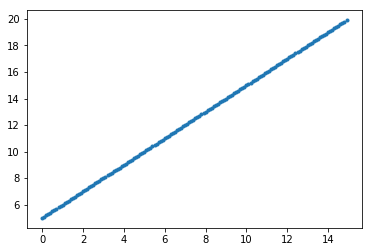

In [9]:
pl.show()

#### Introducing error
In real world experiments, there is usually some measurement error - so let's add some to our simulation.
We'll make an assumption about the measurement error here - that it's normally distributed about the true value.

In [10]:
noise = np.random.normal(0.0, 1.0, x.size)
noise

array([ 0.91581556, -1.05301126,  0.27391536, -0.82366661, -0.41113026,
        0.2852516 ,  0.63688065,  0.57883233,  2.48594884,  0.69692417,
        1.46627877, -0.27092272, -0.71828883,  0.80312779,  0.38059587,
        1.09264962,  1.83191144,  0.9025268 ,  0.53962876,  1.63413417,
        0.5234586 ,  0.99336271, -1.14676274,  0.98705144,  0.5955249 ,
        0.76210896, -0.4324563 , -0.54665123,  0.1397982 , -0.47432792,
        0.52816556, -0.40089883,  1.40151598, -0.33694718, -1.33866327,
        0.56727503,  1.15327233, -0.76024158, -0.91782024, -0.48454735,
       -0.24384679,  0.37114257, -0.40835661, -0.72724809,  0.65785452,
       -0.14265847, -0.79465681,  1.29592268,  0.25007235,  0.97471085,
       -0.85112458, -0.07426229, -1.08996232,  0.81512324,  1.12822777,
        1.22564424,  0.1807771 ,  0.15751939, -0.16313508,  0.87703755,
        0.08204841,  0.0233813 ,  0.12738234, -0.80051366,  0.14647158,
       -1.01263533,  0.68598106, -1.40378215, -0.50193718, -0.68

Let's have a look at the noise data.
This kind of 2D plot doesn't make much sense as we only have one-dimensional data.
The x-axis is just the position in the array the value occurs.
However, it does serve to display how the values are fairly evenly balanced around 0 on the y-axis and are more likely to be close to it than further away.

In [11]:
pl.plot(noise, '.')

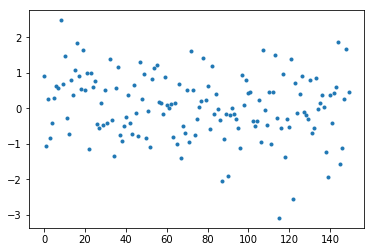

In [12]:
pl.show()

In [13]:
y_meas = y + noise

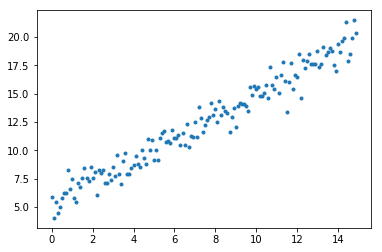

In [14]:
pl.plot(x, y_meas, '.')
pl.show()

#### Best fit
From the data with the errors included, we can estimate the best `m` and `c` that fits the data.
We know these values should be 1.0 and 5.0 respectively, but the error is random so they might not be exact.

In [25]:
x_avg = np.mean(x)
y_avg = np.mean(y_meas)

x_norm = x - x_avg
y_norm = y_meas - y_avg

m_est = np.sum(x_norm * y_norm) / np.sum(x_norm * x_norm)
c_est = y_avg - m_est * x_avg

Here are the estimated values.
As you can see, they are close to the true values.

In [26]:
m_est, c_est

(0.96576772519116516, 5.3039011041596726)

Numpy has this functionality built-in. We can compare our values to those here.

In [33]:
np.polyfit(x, y_meas, 1)

array([ 0.96576773,  5.3039011 ])

We can then calculate the predicted y values from the estimated parameters.

In [17]:
y_est = (m_est * x) + c

You can see in the following plot of both the original line (in red) and the estimated line that they are very close to each other. 

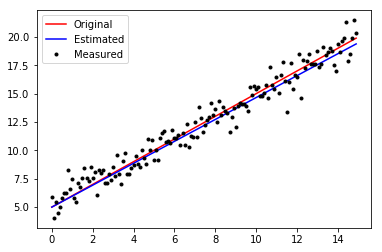

In [18]:
pl.plot(x, y, 'r-', label='Original')
pl.plot(x, y_est, 'b-', label='Estimated')
pl.plot(x, y_meas, 'k.', label='Measured')
pl.legend()
pl.show()

We can also check how good a fit the model is, using the actual measured values to calculate it.

In [19]:
r_sq = 1 - np.sum((y_meas - y_est)**2) / np.sum(y_norm**2)
r_sq

0.95154098991561697

#### End